In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import losses, optimizers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#運用pd讀取資料
milk = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv", index_col = 'Month')
milk.tail()

,Monthly milk production (pounds per cow)
Month,
1975-08,858
1975-09,817
1975-10,827
1975-11,797
1975-12,843


In [3]:
#運用pd Datetime讀取資料
milk.index = pd.to_datetime(milk.index)
milk.head()

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
print(milk.index)
milk.index = pd.to_datetime(milk.index)
print(milk.index)

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)
DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)


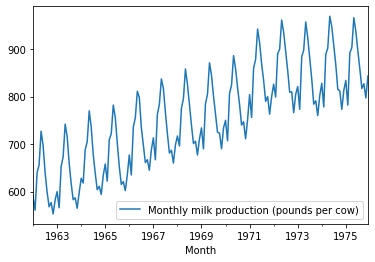

In [5]:
#讀取資料(圖表)
milk.plot()

In [6]:
#讀取資料(資訊)
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Monthly milk production (pounds per cow)  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [7]:
#創建dataset
train_set = milk.head((1976-1962-1) * 12)
test_set = milk.tail(12)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

len(train_scaled)

156

In [8]:
def build_train_data(data, past_monthes = 12, future_monthes = 1):
  X_train, Y_train = [], []

  for i in range(data.shape[0] + 1 - past_monthes - future_monthes):
    X_train.append(np.array(data[i : i + past_monthes]))
    Y_train.append(np.array(data[i + past_monthes : i + past_monthes + future_monthes]))
  
  return np.array(X_train).reshape([-1, 12]), np.array(Y_train).reshape([-1, 1])


x, y = build_train_data(train_scaled)
print('x shape:', x.shape, 'y shape:', y.shape)

x shape: (144, 12) y shape: (144, 1)


In [9]:
"""
def splitData(X, Y, rate):

  X_val = X[:int(X.shape[0] * rate)]
  Y_val = Y[:int(Y.shape[0] * rate)]

  return X_val, Y_val
"""

In [10]:
#X_val, Y_val = splitData(x, y, 0.1)

In [23]:
#構建網路模型
model = tf.keras.Sequential([          
      tf.keras.layers.Reshape((12, 1), batch_size = 1),
      tf.keras.layers.SimpleRNN(10, return_sequences = True),
      tf.keras.layers.SimpleRNN(10, return_sequences = True),
      tf.keras.layers.Dense(1)                           
])

In [24]:
#compile模型
model.compile(optimizer = optimizers.Adam(0.001), loss = losses.MeanSquaredError())

In [25]:
#訓練模型
callback = EarlyStopping(monitor = "loss", patience = 10, verbose = 1, mode = "auto")
model.fit(x, y, epochs = 60, batch_size = 1)

Epoch 1/60
144/144 [==============================] - 2s 10ms/step - loss: 0.0740
Epoch 2/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0309
Epoch 3/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0283
Epoch 4/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0325
Epoch 5/60
144/144 [==============================] - 1s 9ms/step - loss: 0.0275
Epoch 6/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0241
Epoch 7/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0240
Epoch 8/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0186
Epoch 9/60
144/144 [==============================] - 1s 9ms/step - loss: 0.0236
Epoch 10/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0155
Epoch 11/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0130
Epoch 12/60
144/144 [==============================] - 1s 10ms/step - loss: 0.0111
Epoch 13/60
144

In [27]:
#預測模型
train_seed = list(train_scaled[-12:].flatten())

def get_prediction(data_list):
    predict = []
    train_seed = data_list
    for i in range(12):
        x_train = np.array(train_seed[-12:]).reshape(1, 12)
        one_predict = model.predict(x_train)[0][0]
        predict.append(one_predict)
        train_seed.append(one_predict)

    return predict, train_seed

In [28]:
predict, train_seed = get_prediction(train_seed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


ValueError: ignored

In [ ]:
results = scaler.inverse_transform(np.array(predict).reshape(12, 1))
test_set['Generated'] = results
test_set

NameError: ignored

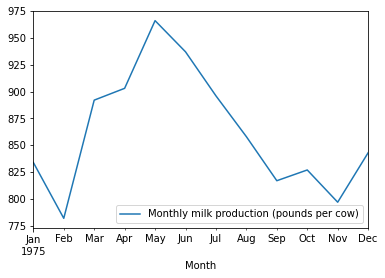

In [ ]:
test_set.plot()

In [ ]:
true = milk.tail(12).to_numpy()
def mape(true, results):
    return np.mean(np.abs((results - true) / true)) * 100

print(mape(true, results))

2.4375007707027057
